In [5]:
import pandas as pd
import requests
import json
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure

In [2]:
# Base url to service
url = 'https://api-metrika.yandex.net/stat/v1/data?'

# &-separated parameters of query in a form of name=value, taken from the metrica site
visits = 'metrics=ym:s:visits&dimensions=ym:s:date&id=44147844'
url = url + visits

# Get json of response
query = requests.get(url)
json_data = json.loads(query.text)

# Conversion of obtained json to dataframe
visits_data = pd.DataFrame([(
                             i['dimensions'][0]['name'],
                             i['metrics'][0]) for i in json_data['data']], 
                           columns=['date', 'visits'])

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. 

In [3]:
visits_data

,date,visits
0,2022-05-30,1276.0
1,2022-05-31,1266.0
2,2022-06-01,1227.0
3,2022-05-27,915.0
4,2022-06-02,536.0
5,2022-05-28,492.0
6,2022-05-29,491.0


In [4]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/Lesson_7/step_1_lesson_7.csv')

In [14]:
df.dtypes

date          object
user_type     object
visits       float64
dtype: object

In [27]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


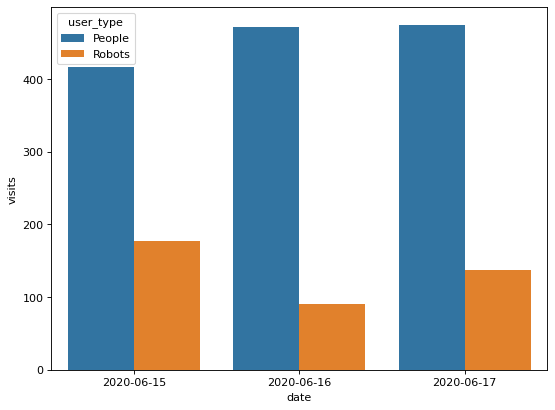

In [26]:
figure(figsize=(8, 6), dpi=80)
sns.barplot(x = df.date, y = df.visits, hue =df.user_type  )

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [28]:
df_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/Lesson_7/step_2_lesson_7.csv')

In [ ]:
#считаем сумму посещений с Chrome
df_2[df_2.browser.str.contains('Google Chrome')].visits.sum()

In [30]:
#все посещения
df_2.visits.sum()

594.0

In [46]:
round(((df_2[df_2.browser.str.contains('Google Chrome')].visits.sum()) / df_2.visits.sum()) * 100)

60

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

В качестве ответа укажите название браузера.

In [47]:
df_3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/Lesson_7/step_3_lesson_7.csv')

In [50]:
df_3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [58]:
df_3_1 = df_3.groupby(['browser','user_type'],as_index = False)\
    .agg({'visits':'sum'})\
    .pivot(index = 'browser', columns = 'user_type', values = 'visits').reset_index().fillna(0)\


In [80]:
#общее число посетитилей на браузер
df_3_1['all'] = df_3_1.People + df_3_1.Robots

In [106]:
#процент роботов от общего числа
df_3_1['%'] = df_3_1['Robots']/df_3_1['all'] * 100
#округление до 2 знаков
df_3_1['%'] = df_3_1['%'].round(2)

In [105]:
df_3_1.sort_values('%',ascending = False)

user_type,browser,People,Robots,%,all
11,UCWEB,0.0,4.0,100.00,4.0
9,Safari,19.0,22.0,53.66,41.0
5,Firefox,27.0,31.0,53.45,58.0
2,Chromium,1.0,1.0,50.00,2.0
8,Opera,11.0,5.0,31.25,16.0
6,Google Chrome,250.0,104.0,29.38,354.0
4,Edge,4.0,1.0,20.00,5.0
13,Yandex Browser,47.0,7.0,12.96,54.0
10,Samsung Internet,8.0,1.0,11.11,9.0
7,Mobile Safari,15.0,1.0,6.25,16.0


Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [6]:
df_4 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/Lesson_7/step_4_lesson_7.csv')

In [7]:
df_4_1 = df_4.groupby(['browser', 'user_type'],as_index= False)\
    .agg({'visits':'sum'})\
    .pivot(index = 'browser',columns='user_type',values = 'visits').reset_index().fillna(0)

In [137]:
all_users = df_4_1.People.sum() + df_4_1.Robots.sum()

In [25]:
df_4['percent'] = df_4.visits / df_4.visits.sum() * 100

In [34]:
df_4['percent'] = df_4.percent.round(1)

In [35]:
df_4

,date,browser,user_type,visits,percent
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2
5,2020-06-15,Firefox,People,27.0,4.5
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2
8,2020-06-15,Mobile Safari,People,15.0,2.5
9,2020-06-15,Opera,People,11.0,1.9


In [161]:
df_4[(df_4.user_type == 'People') & (df_4.browser == 'Safari')].percent.round(1)

7    3.2
Name: percent, dtype: float64

💀 Сложное задание! 💀

При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 

В ответе напишите слово Да, если всё сделали :)

In [ ]:
#сохранить данные в CSV
df_4.to_csv('df_4')

In [36]:
#Подключение библиотек, файла токена и авторизация с его помощью
import pandas as pd
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

#токен (project_id из файла credentials.json)
path_to_credentials = 'driven-nature-139915-e56c19585366.json'

#работаем с таблицей to_sequence (уже создана)
#table_name = 'to_sequence'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

#my_mail = 'alexsam567@gmail.com'


# Авторизация
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)

In [37]:
# Создаем пустую таблицу
table_name = 'Table_df'
sheet = gs.create(table_name)
# Раздаем доступ
sheet.share(my_mail, perm_type='user', role='writer')
#ссылка
spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % sheet.id

In [38]:
# Передаем наш датафрейм
df = df_4
# Looks like spreadsheet should be already present at the dist (so, run code in create table section)
sheet = 'Sheet1'
d2g.upload(df, table_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Sheet1' id:0>

In [39]:
#прямая ссылка на скачивание
spreadsheet_url

'https://docs.google.com/spreadsheets/d/1rx-AxroV0YIssOlTqJlKOQfJiFJE1-_-13JVgZyga_s'

In [42]:
#Подключаем библиотеку вк апи
import vk_api
#указываем токен
token = '824fab60a7b0f0badb19639cb48b42bd16a687fc975569c2b3a5f25a8c984d9d23178a5422f6368ece4e8'
#подключаем апи
vk_session = vk_api.VkApi(token = token)
vk = vk_session.get_api()
#Отправить ссылку на получившийся файл в личку вк черех сообщество
vk.messages.send(chat_id = 1, random_id = 2, message = spreadsheet_url)

0

⭐️Задание со звёздочкой!⭐️

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [43]:
#читаем данные другого аналитика
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [44]:
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [48]:
df = df.merge(df_4, on =['date', 'browser','user_type'])

In [50]:
df['userPerVisit'] = df.visits / df.users

посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

In [55]:
df.query('browser =="Google Chrome" and user_type == "Robots"')

,date,browser,user_type,users,visits,percent,userPerVisit
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.5,1.0
